# Data preparation


In [1]:
!pip install requests

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime as dt
import keras
import zipfile
import time
import os
import math
import datetime
import pandas as pd
import pickle
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import os
import logging
import imblearn
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime, timedelta
from datetime import date
from dateutil import relativedelta
from io import StringIO
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.utils import shuffle
from io import StringIO
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
from subprocess import check_output
from IPython.display import display
from colorama import Fore, Back, Style
from scipy.stats import pearsonr

C:\Users\Korisnik\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


# Load data

In [3]:
Months = ["Jan ", "Feb ", "Mar ", "Apr ", "May ", "Jun ", "July ", "Aug ", "Sept ", "Oct ", "Nov ", "Dec "]
Years = [ "2014" , "2015" , "2016" , "2017"]

for year in Years:
    for month in Months:
        file = 'data/ttc-streetcar-delay-data-' + year + '.xlsx'
        sheet =  month + year
        if( year == "2014"  and  month == "Jan " ): 
            data_original = pd.read_excel( file ,  sheet)
        if( year == "2017"  and  month == "Sept " ): 
            continue
        else:
            data_original = data_original.append(pd.read_excel( file ,  sheet))

In [66]:
data_original

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0
...,...,...,...,...,...,...,...,...,...,...
1693,2017-12-31,501,19:58:00,Sunday,Queen,General Delay,7.0,15.0,B/W,NaN
1694,2017-12-31,501,21:15:00,Sunday,Queen and Neville park,Mechanical,12.0,24.0,W/B,4110.0
1695,2017-12-31,501,21:44:00,Sunday,Queen and Dufferin,Mechanical,12.0,24.0,W/B,1419.0
1696,2017-12-31,510,22:15:00,Sunday,Spadina and King,Mechanical,5.0,10.0,S/B,4447.0


In [67]:
data = data_original

In [68]:
data.head()

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Dundas and Roncesvalles,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,King and Shaw,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Kingston road and Bingham,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,King St. and Roncesvalles Ave.,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,King and Bathurst,Utilized Off Route,3.0,6.0,E/B,4080.0


In [69]:
data.shape

(50374, 10)

In [70]:
data = data.drop(columns=['Location'])

In [71]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4.0,8.0,E/B,4018.0
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20.0,22.0,E/B,4128.0
2,2014-01-02,501,14:01:00,Thursday,Held By,13.0,19.0,W/B,4016.0
3,2014-01-02,504,14:22:00,Thursday,Investigation,7.0,11.0,W/B,4175.0
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3.0,6.0,E/B,4080.0


In [72]:
data.shape

(50374, 9)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50374 entries, 0 to 1697
Data columns (total 9 columns):
Report Date    50374 non-null datetime64[ns]
Route          50374 non-null int64
Time           50374 non-null object
Day            50374 non-null object
Incident       50374 non-null object
Min Delay      50362 non-null float64
Min Gap        50360 non-null float64
Direction      50298 non-null object
Vehicle        46481 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 3.8+ MB


### Deleting data that contains a missing value

In [74]:
data.isnull().values.any()

True

In [75]:
data[data.isnull().any(axis=1)]

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
13,2014-01-03,501,05:29:00,Friday,Mechanical,4.0,11.0,W/B,NaN
16,2014-01-03,501,05:40:00,Friday,Mechanical,1.0,7.0,W/B,NaN
17,2014-01-03,506,05:47:00,Friday,Mechanical,5.0,11.0,E/B,NaN
19,2014-01-03,506,05:48:00,Friday,Mechanical,5.0,11.0,E/B,NaN
20,2014-01-03,511,05:54:00,Friday,Mechanical,6.0,11.0,N/B,NaN
...,...,...,...,...,...,...,...,...,...
1591,2017-12-29,504,17:00:00,Friday,General Delay,12.0,16.0,E/B,NaN
1615,2017-12-30,501,09:22:00,Saturday,Utilized Off Route,6.0,12.0,B/W,NaN
1635,2017-12-30,511,15:01:00,Saturday,Emergency Services,43.0,8.0,W/B,NaN
1674,2017-12-31,504,13:00:00,Sunday,General Delay,5.0,8.0,B/W,NaN


In [76]:
data = data.dropna()

In [77]:
data.isnull().values.any()

False

In [78]:
print("Number of data containing mising value - " , data[data.isnull().any(axis=1)].shape[0] )

Number of data containing mising value -  0


In [79]:
data.shape

(46424, 9)

### Conversion of values in columns Vehicle, Min Gap and Min Delay to int

In [80]:
data = data.astype({"Vehicle": int, "Min Gap": int, "Min Delay": int})

In [81]:
data.head()

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4,8,E/B,4018
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20,22,E/B,4128
2,2014-01-02,501,14:01:00,Thursday,Held By,13,19,W/B,4016
3,2014-01-02,504,14:22:00,Thursday,Investigation,7,11,W/B,4175
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3,6,E/B,4080


### Clean up Route

I will remove data with invalid routes that are not in full list of currently used routes by the Toronto streetcar system 

In [82]:
valid_routes = ['501','502','503','504','505','506','509','510','511','512','301','304','306','310']

In [83]:
len(valid_routes)

14

In [84]:
data['Route'].unique()

array([505, 504, 501, 510, 512, 511, 506, 503, 502, 509, 301, 401, 905,
       508,  25,   2,  50, 805, 306, 111,  23,  35,  18,  51,   5,  62,
        57,   4, 405, 500,  68,  20,   8,  63, 201,  65, 210, 204,   9,
        17,  21,  33,  24,  49,  40, 550,  12, 375,   1,   7, 807,   3,
       804,  16,  45,  10, 536,  93, 304,  41,  37,  11, 205, 317,  13,
        22, 535,  14,  83, 514,  81,  15,  55, 999, 519,  43,   6,  56,
        19, 830, 705,  61,  80,  26,  29, 516,  54, 595, 596, 310,  64,
        87, 591], dtype=int64)

In [85]:
data['Route'].nunique()

93

In [86]:
data = data[data['Route'].isin(valid_routes)]

In [87]:
data['Route'].unique()

array([505, 504, 501, 510, 512, 511, 506, 503, 502, 509, 301, 306, 304,
       310], dtype=int64)

In [88]:
data['Route'].nunique()

14

In [89]:
data.shape

(45100, 9)

### Clean up Direction

I will Unified directions. 
Direction should be categorized and can have 4 valid values:  e - for Eastbound, w - for Westbound, s - for Southbound, n - for  Northbound. 

In [90]:

data['Direction'].unique() 

array(['E/B', 'W/B', 'S/B', 'N/B', 'EB', 'WB', 'B/W', 's', 'NB', 'wb',
       'eb', 'w/b', 'ew', 'b/w', 'eastbound', 'w', 'sb', 'southbound',
       'northbound', 'Service adjusted.', 'westbound', 'nb', 'b#', 'SB',
       'we', 'EW', 'E', 'Service adjusted', 'W', '14', 's/b', '5', 'Bw',
       '0', 'sw', '2', '506', '54495', '4075', 'bs', 'wruiter adv',
       '(Ref', 'e', '9', 'gap', '1114', 'run', 'ss', '19', '68029',
       'eb``', '6', '512', 'W`', 'n/b', '\\5', '10', '4', '7', '13',
       '-BD#', '`', '510', '\\', '26', 'W\\B', 'N', '20', '8', 'e/b',
       'ee', '.', 'See also', 'w/B', 'E5'], dtype=object)

In [91]:
print( "Number of All Direction from original data set", data['Direction'].nunique() )

Number of All Direction from original data set 75


In [92]:
valid_directions = ['e','w','s','n']    

In [93]:
data['Direction'] = data['Direction'].str.lower().str.replace('/','')
data['Direction'] = data['Direction'].replace({'eastbound':'e','westbound':'w','southbound':'s','northbound':'n'})
data['Direction'] = data['Direction'].replace('b','',regex=True)

In [94]:
 data = data[data['Direction'].isin(valid_directions)]

In [95]:
print( "Direction after cleanup", data['Direction'].unique() )

Direction after cleanup ['e' 'w' 's' 'n']


In [96]:
data

,Report Date,Route,Time,Day,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-02,505,06:31:00,Thursday,Late Leaving Garage,4,8,e,4018
1,2014-01-02,504,12:43:00,Thursday,Utilized Off Route,20,22,e,4128
2,2014-01-02,501,14:01:00,Thursday,Held By,13,19,w,4016
3,2014-01-02,504,14:22:00,Thursday,Investigation,7,11,w,4175
4,2014-01-02,504,16:42:00,Thursday,Utilized Off Route,3,6,e,4080
...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,Sunday,Held By,8,16,e,4164
1694,2017-12-31,501,21:15:00,Sunday,Mechanical,12,24,w,4110
1695,2017-12-31,501,21:44:00,Sunday,Mechanical,12,24,w,1419
1696,2017-12-31,510,22:15:00,Sunday,Mechanical,5,10,s,4447


### One-hot encoding

In machine learning, one-hot encoding is a frequently used method to deal with categorical data. Because many machine learning models need their input variables to be numeric I will transform categorical variables Direction, Incident and Day using one-hot encoding.

In [97]:
data['Direction'].value_counts()

w    19668
e    18319
n     3686
s     3371
Name: Direction, dtype: int64

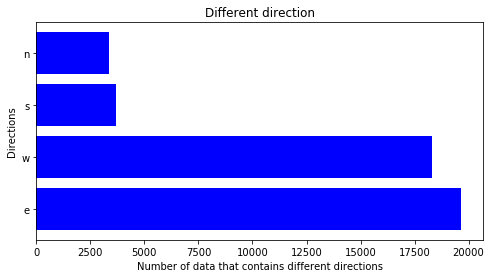

In [98]:
fig = plt.figure(figsize=(8, 4))
  
# creating the bar plot
plt.barh(data['Direction'].unique(), data['Direction'].value_counts(), color='blue')
  
plt.xlabel("Number of data that contains different directions")
plt.ylabel("Directions")
plt.title("Different direction")
plt.show()

In [99]:
data['Incident'].value_counts()

Mechanical               23368
Investigation             6324
Held By                   5581
Late Leaving Garage       4699
Utilized Off Route        1593
General Delay             1535
Emergency Services        1310
Diversion                  627
Overhead - Pantograph        7
Name: Incident, dtype: int64

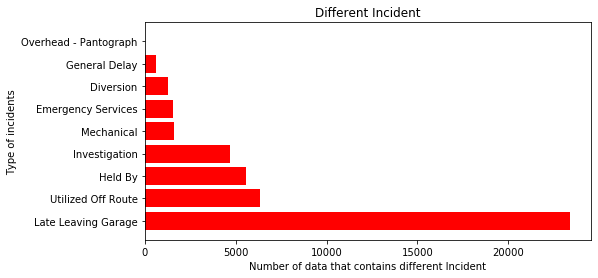

In [100]:
fig = plt.figure(figsize=(8, 4))
  
# creating the bar plot
plt.barh(data['Incident'].unique(), data['Incident'].value_counts(), color='red')
  
plt.xlabel("Number of data that contains different Incident")
plt.ylabel("Type of incidents")
plt.title("Different Incident")
plt.show()

In [102]:
data['Day'].value_counts()

Thursday     7473
Friday       7127
Wednesday    7116
Tuesday      7094
Monday       6624
Saturday     5087
Sunday       4523
Name: Day, dtype: int64

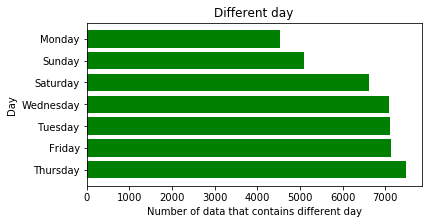

In [103]:
fig = plt.figure(figsize=(6, 3))
  

plt.barh(data['Day'].unique(), data['Day'].value_counts(), color='green')
  
plt.xlabel("Number of data that contains different day")
plt.ylabel("Day")
plt.title("Different day")
plt.show()

In [104]:
data = pd.get_dummies(data, columns=['Direction'])

In [105]:
data = pd.get_dummies(data, columns=['Incident'])

In [106]:
data = pd.get_dummies(data, columns=['Day'])

In [107]:
data

,Report Date,Route,Time,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,4,8,4018,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,20,22,4128,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,13,19,4016,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,7,11,4175,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,3,6,4080,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,2017-12-31,505,17:42:00,8,16,4164,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1694,2017-12-31,501,21:15:00,12,24,4110,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1695,2017-12-31,501,21:44:00,12,24,1419,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
1696,2017-12-31,510,22:15:00,5,10,4447,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [108]:
data.shape

(45044, 26)


### Date and Time
Instead of the Report Date column, I will add the Year, Month and Day columns and instead of the Time column I will add the Hour column

In [109]:
data.head()

,Report Date,Route,Time,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,...,Incident_Mechanical,Incident_Overhead - Pantograph,Incident_Utilized Off Route,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2014-01-02,505,06:31:00,4,8,4018,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2014-01-02,504,12:43:00,20,22,4128,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2014-01-02,501,14:01:00,13,19,4016,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,2014-01-02,504,14:22:00,7,11,4175,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2014-01-02,504,16:42:00,3,6,4080,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [110]:
# Creating the year column from column Report Date.
data['Year'] = data['Report Date'].dt.year

# Creating the month column from column Report Date.
data['Month'] = data['Report Date'].dt.month

# Creating the day column from column Report Date.
data['Day'] = data['Report Date'].dt.day

# Creating the hour column from column Time.
data[['Hour']] = pd.DataFrame([(x.hour) for x in data['Time']])

In [111]:
data.head()

,Report Date,Route,Time,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,2014-01-02,505,06:31:00,4,8,4018,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,2014-01-02,504,12:43:00,20,22,4128,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,2014-01-02,501,14:01:00,13,19,4016,0,0,0,1,...,0,0,0,1,0,0,2014,1,2,14
3,2014-01-02,504,14:22:00,7,11,4175,0,0,0,1,...,0,0,0,1,0,0,2014,1,2,14
4,2014-01-02,504,16:42:00,3,6,4080,1,0,0,0,...,0,0,0,1,0,0,2014,1,2,16


In [112]:
data.shape

(45044, 30)

In [113]:
data = data.drop(columns=[ 'Report Date' , 'Time'])

In [114]:
data

,Route,Min Delay,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
0,505,4,8,4018,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,6
1,504,20,22,4128,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,12
2,501,13,19,4016,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
3,504,7,11,4175,0,0,0,1,0,0,...,0,0,0,1,0,0,2014,1,2,14
4,504,3,6,4080,1,0,0,0,0,0,...,0,0,0,1,0,0,2014,1,2,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692,505,8,16,4164,1,0,0,0,0,0,...,0,0,1,0,0,0,2017,12,31,9
1694,501,12,24,4110,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,12,31,11
1695,501,12,24,1419,0,0,0,1,0,0,...,0,0,1,0,0,0,2017,12,31,11
1696,510,5,10,4447,0,0,1,0,0,0,...,0,0,1,0,0,0,2017,12,31,11


In [115]:
data.shape

(45044, 28)

### Adding a Delay column 
Delay column will have a value of 0 if the value in the Min Delay column is 0 otherwise it will have a value of 1. 0 means no delay. 1 means there are delays

In [116]:
data['Min Delay'].value_counts()

5      7563
6      6112
4      5913
10     3039
3      2412
       ... 
211       1
338       1
210       1
178       1
639       1
Name: Min Delay, Length: 312, dtype: int64

In [117]:
data["Delay"] = [0 if x == 0 else 1 for x in data['Min Delay'] ]

In [118]:
data = data.drop(columns=['Min Delay'])

In [119]:
data.head()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour,Delay
0,505,8,4018,1,0,0,0,0,0,0,...,0,0,1,0,0,2014,1,2,6,1
1,504,22,4128,1,0,0,0,0,0,0,...,0,0,1,0,0,2014,1,2,12,1
2,501,19,4016,0,0,0,1,0,0,0,...,0,0,1,0,0,2014,1,2,14,1
3,504,11,4175,0,0,0,1,0,0,0,...,0,0,1,0,0,2014,1,2,14,1
4,504,6,4080,1,0,0,0,0,0,0,...,0,0,1,0,0,2014,1,2,16,1


In [120]:
data[data['Delay'] == 0].shape[0]

668

In [121]:
data[data['Delay'] == 1].shape[0]

44376

### Oversampling 
Since the data is not balanced I will do Oversampling

In [122]:
oversampling_set = data[data['Delay'] == 0.0]

In [123]:
for x in range(50):
    data  = data.append(oversampling_set)
    data = shuffle(data)

In [124]:
data = shuffle(data)

In [125]:
print("Without delay ", data[data['Delay']==0].shape[0])
print("With delay ", data[data['Delay']==1].shape[0])

Without delay  34068
With delay  44376


In [126]:
data

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour,Delay
485,501,0,4227,0,0,0,1,0,0,0,...,0,0,0,0,0,2014,6,13,11,0
314,505,34,4190,0,0,0,1,0,1,0,...,0,1,0,0,0,2014,5,11,6,1
53,501,0,4208,1,0,0,0,0,0,0,...,0,0,1,0,0,2017,2,2,5,0
1226,505,16,4134,0,0,1,0,0,0,0,...,0,0,0,0,0,2016,12,23,0,1
915,510,12,4091,0,1,0,0,0,0,0,...,0,0,0,0,1,2014,10,29,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,512,0,4078,1,0,0,0,0,0,0,...,0,1,0,0,0,2017,2,5,5,0
108,509,0,4074,1,0,0,0,0,0,0,...,1,0,0,0,0,2016,9,3,15,0
828,502,24,8156,0,0,0,1,0,0,0,...,0,0,1,0,0,2017,3,23,16,1
1037,504,8,4041,0,0,0,1,0,0,0,...,0,0,1,0,0,2016,1,28,20,1


In [127]:
data.describe() 

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour,Delay
count,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,...,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000,78444.000000
mean,502.700487,11.364986,4299.540908,0.386505,0.104355,0.093965,0.415175,0.023291,0.028173,0.072472,...,0.112654,0.101002,0.172390,0.157998,0.147443,2015.573556,6.374254,15.879621,10.750433,0.565703
std,26.667264,29.411028,1433.941371,0.486952,0.305722,0.291782,0.492755,0.150826,0.165468,0.259270,...,0.316171,0.301333,0.377722,0.364742,0.354549,1.059206,3.400198,8.883369,5.436824,0.495667
min,301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000,0.000000
25%,504.000000,0.000000,4076.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,4.000000,8.000000,6.000000,0.000000
50%,505.000000,8.000000,4152.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,6.000000,16.000000,10.000000,1.000000
75%,510.000000,14.000000,4227.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,9.000000,24.000000,15.000000,1.000000
max,512.000000,4216.000000,163242.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,31.000000,23.000000,1.000000


In [128]:
feature_names = data.columns
# for col in feature_names:
#     print(col)

In [129]:
corrcoefs = data.corr()['Delay']
corrcoefs

Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesday                     0.035115
Year       

In [130]:
# corrcoefs_for_barh = ( (corrcoefs.drop('Delay')) * 1000000 ).astype(int)
corrcoefs_for_barh = corrcoefs.drop('Delay')
corrcoefs_for_barh


Route                            -0.034926
Min Gap                           0.278729
Vehicle                           0.004735
Direction_e                       0.048985
Direction_n                      -0.087057
Direction_s                      -0.077461
Direction_w                       0.051473
Incident_Diversion               -0.073416
Incident_Emergency Services       0.006497
Incident_General Delay           -0.174988
Incident_Held By                  0.144867
Incident_Investigation           -0.056236
Incident_Late Leaving Garage      0.077048
Incident_Mechanical               0.061083
Incident_Overhead - Pantograph    0.008277
Incident_Utilized Off Route      -0.080581
Day_Friday                       -0.032804
Day_Monday                        0.024392
Day_Saturday                      0.001048
Day_Sunday                       -0.002310
Day_Thursday                     -0.020291
Day_Tuesday                      -0.001645
Day_Wednesday                     0.035115
Year       

IndexError: arrays used as indices must be of integer (or boolean) type

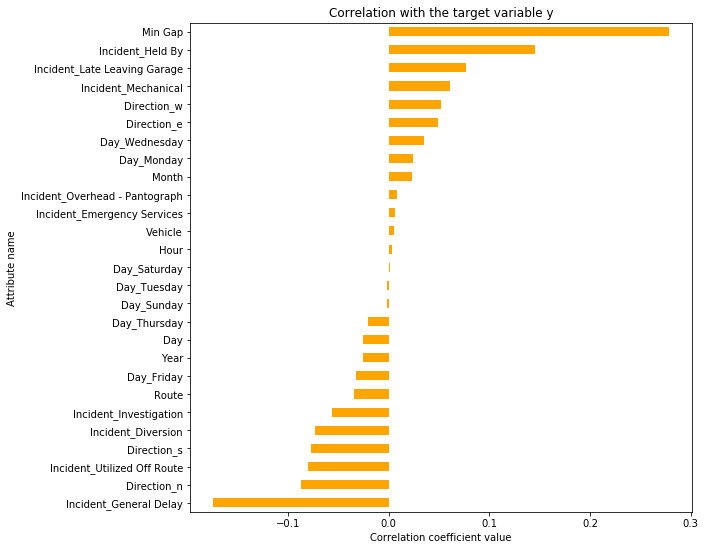

In [131]:
number_of_features = len(data.columns)

coefs_for_plot = pd.Series(corrcoefs_for_barh).sort_values()
coefs_for_plot.plot(kind = "barh", color = 'orange', figsize = (9, 9))

plt.title("Correlation with the target variable y")
plt.ylabel('Attribute name')
plt.xlabel('Correlation coefficient value')
plt.yticks(np.arange(number_of_features), list(feature_names[coefs_for_plot.index]))
plt.plot()

In [132]:
y = data['Delay']
data = data.drop(columns=['Delay'])
X = data

In [133]:
X.corr()

,Route,Min Gap,Vehicle,Direction_e,Direction_n,Direction_s,Direction_w,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,...,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Year,Month,Day,Hour
Route,1.000000,-0.090835,-0.000206,-0.007527,0.056262,0.065490,-0.066248,-0.068125,-0.115807,0.066561,...,0.025761,-0.076482,-0.057406,0.022075,-0.004348,0.038360,-0.015195,-0.024061,-0.011307,-0.001935
Min Gap,-0.090835,1.000000,-0.012631,-0.012296,-0.051257,-0.036179,0.065376,0.088779,0.088769,-0.056070,...,0.000389,0.008964,0.024205,-0.025578,0.016828,-0.002881,-0.009246,0.013451,-0.018059,-0.006272
Vehicle,-0.000206,-0.012631,1.000000,0.029031,0.025599,-0.014690,-0.035873,-0.020570,0.012695,-0.044952,...,0.008296,0.021635,0.024436,-0.040605,-0.002598,-0.002825,-0.108997,0.031157,-0.001586,0.013271
Direction_e,-0.007527,-0.012296,0.029031,1.000000,-0.270932,-0.255613,-0.668767,-0.017383,-0.018855,0.150019,...,0.020339,-0.020828,-0.035471,-0.006980,0.028255,0.020282,-0.043491,-0.033423,-0.016545,-0.024280
Direction_n,0.056262,-0.051257,0.025599,-0.270932,1.000000,-0.109926,-0.287601,-0.025340,-0.025106,-0.072576,...,-0.014808,-0.009256,-0.007168,-0.043958,0.018935,0.016469,0.031135,-0.037375,-0.034034,0.029090
Direction_s,0.065490,-0.036179,-0.014690,-0.255613,-0.109926,1.000000,-0.271340,-0.008306,0.020948,-0.069629,...,-0.007579,0.009898,0.009934,-0.016505,-0.002708,0.022575,0.043613,0.032938,0.010645,0.029907
Direction_w,-0.066248,0.065376,-0.035873,-0.668767,-0.287601,-0.271340,1.000000,0.037818,0.021805,-0.061993,...,-0.006424,0.020465,0.033618,0.043944,-0.038067,-0.043629,-0.002163,0.036714,0.031163,-0.011764
Incident_Diversion,-0.068125,0.088779,-0.020570,-0.017383,-0.025340,-0.008306,0.037818,1.000000,-0.026292,-0.043165,...,-0.005748,0.045228,0.047816,-0.036912,-0.032596,0.004201,0.024028,0.008930,-0.021989,0.003933
Incident_Emergency Services,-0.115807,0.088769,0.012695,-0.018855,-0.025106,0.020948,0.021805,-0.026292,1.000000,-0.047593,...,0.002627,0.058491,-0.008236,-0.006116,0.007778,-0.029954,0.000469,0.033781,0.020867,0.014830
Incident_General Delay,0.066561,-0.056070,-0.044952,0.150019,-0.072576,-0.069629,-0.061993,-0.043165,-0.047593,1.000000,...,-0.011242,-0.052943,0.004047,0.024207,-0.006500,0.013977,-0.077786,-0.015583,0.014625,-0.039306


In [134]:
number_of_features = X.shape[1]

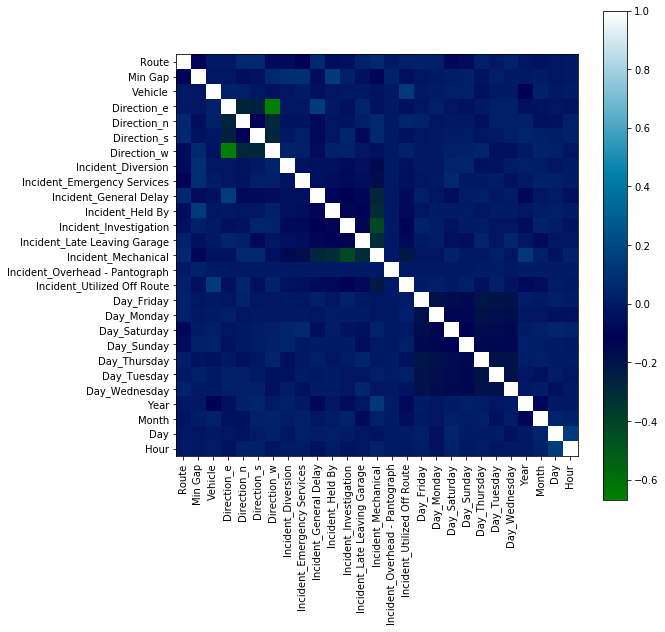

In [135]:
plt.figure(figsize = (9, 9))
plt.xticks(range(0, number_of_features), feature_names, rotation='vertical')
plt.yticks(range(0, number_of_features), feature_names)
plt.imshow(X.corr(), cmap='ocean')
plt.colorbar()
plt.show()

# Logistic regression

In [136]:
from sklearn import linear_model
from sklearn import model_selection
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets

In [137]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.33, random_state = 7, stratify = y)

In [138]:
X_train.shape

(52557, 27)

In [139]:
X_test.shape

(25887, 27)

In [140]:
 y_train.shape
    

(52557,)

In [141]:
y_test.shape

(25887,)

In [142]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [143]:
wd_train = np.sum(y_train == 0)
d_train = np.sum(y_train == 1)
print('Delay: ', d_train, '  Without Delay: ', wd_train)

Delay:  29732   Without Delay:  22825


In [144]:
wd_test = np.sum(y_test == 0)
d_test = np.sum(y_test == 1)
print('Delay: ', d_test, '  Without Delay: ', wd_test)

Delay:  14644   Without Delay:  11243


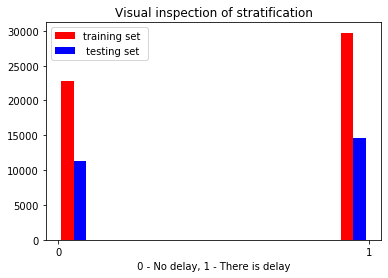

In [145]:
plt.title("Visual inspection of stratification")
plt.xticks([0,1])
plt.xlabel(' 0 - No delay, 1 - There is delay ')
plt.hist([y_train, y_test], color=['red', 'blue'], label=['training set ',' testing set'])
plt.legend(loc='best')
plt.show()

## Učenje modela

In [146]:
model = linear_model.LogisticRegression(solver='lbfgs')

In [147]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
model.intercept_

array([1.54595056])

In [156]:
model.coef_

array([[ 2.10213241e-01,  8.77824419e+00, -1.45793187e-02,
         8.09156974e-02, -6.86901657e-02, -4.22029262e-02,
        -1.22940896e-02, -2.86947938e-01, -1.98139002e-01,
        -2.29516218e-01,  5.32454511e-02, -1.07779215e-01,
         2.44826095e-01,  1.79479061e-01,  7.92085444e-02,
         6.16334051e-04, -1.66291050e-02,  4.14558464e-02,
        -3.97813139e-02, -5.14170991e-02,  1.13662836e-02,
        -1.32208336e-02,  5.77846843e-02, -1.28006805e-01,
         3.42101378e-02, -9.68872521e-03,  1.29596699e-02]])

## Evaluacija

In [160]:
y_test_predicted = model.predict(X_test)

In [161]:
metrics.accuracy_score(y_test, y_test_predicted)

0.9358751496890331

In [162]:
metrics.precision_score(y_test, y_test_predicted)

0.9386486486486486

In [163]:
metrics.recall_score(y_test, y_test_predicted)

0.9486479104069926

In [164]:
metrics.f1_score(y_test, y_test_predicted)

0.9436217905175928

In [165]:
y_train_predicted = model.predict(X_train)

In [166]:
y_train_predicted[:50]

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1], dtype=int64)

In [167]:
train_score = metrics.accuracy_score(y_train, y_train_predicted)

In [168]:
test_score = metrics.accuracy_score(y_test, y_test_predicted)

In [169]:
print("Accuracy at the training set: {train}\nAccuracy at the test set: {test}".format(train=train_score, test=test_score))

Accuracy at the training set: 0.9359742755484521
Accuracy at the test set: 0.9358751496890331


In [170]:
print(metrics.classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11243
           1       0.94      0.95      0.94     14644

    accuracy                           0.94     25887
   macro avg       0.94      0.93      0.93     25887
weighted avg       0.94      0.94      0.94     25887



In [171]:
metrics.confusion_matrix(y_test, y_test_predicted)

array([[10335,   908],
       [  752, 13892]], dtype=int64)

# Neural networks

In [172]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.layers import Dropout
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection
from keras import optimizers
from keras import losses

In [173]:
np.random.seed(7)

## Creating Neural networks

We will create a neural network with advance propagation. The neural network will have an input layer, three hidden layers with, respectively, 100, 40 and 20 neurons, and an output layer. The number of input layer neurons corresponds to the number of attributes of the data set, which is 27. The number of output layer neurons is 1 since it is a binary classification. In hidden layers, we will use relu activation, and in the latter, sigmoid function.

In [174]:
number_of_features = X_train.shape[1]
output_size = 1

In [175]:
number_of_features

27

Optimizer Adam and Binary cross entropy as a function of error will be used.
Since the task of classification metrics will be accuracy. 

In [176]:
model = Sequential()
model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=output_size, activation='sigmoid'))

In [177]:
model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])

In [178]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2800      
_________________________________________________________________
dense_1 (Dense)              (None, 40)                4040      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 7,681
Trainable params: 7,681
Non-trainable params: 0
_________________________________________________________________


In [179]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/50
1314/1314 [==============================] - 8s 6ms/step - loss: 0.5832 - accuracy: 0.6960 - val_loss: 0.4595 - val_accuracy: 0.8234
Epoch 2/50
1314/1314 [==============================] - 7s 5ms/step - loss: 0.3486 - accuracy: 0.8884 - val_loss: 0.2763 - val_accuracy: 0.9256
Epoch 3/50
1314/1314 [==============================] - 7s 5ms/step - loss: 0.2357 - accuracy: 0.9365 - val_loss: 0.2119 - val_accuracy: 0.9443
Epoch 4/50
1314/1314 [==============================] - 9s 7ms/step - loss: 0.1880 - accuracy: 0.9467 - val_loss: 0.1769 - val_accuracy: 0.9473
Epoch 5/50
1314/1314 [==============================] - 7s 6ms/step - loss: 0.1574 - accuracy: 0.9519 - val_loss: 0.1480 - val_accuracy: 0.9529
Epoch 6/50
1314/1314 [==============================] - 7s 5ms/step - loss: 0.1364 - accuracy: 0.9569 - val_loss: 0.1306 - val_accuracy: 0.9584
Epoch 7/50
1314/1314 [==============================] - 6s 5ms/step - loss: 0.1216 - accuracy: 0.9604 - val_loss: 0.1169 - val_accuracy:

In [184]:
epochs = history.epoch

In [185]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

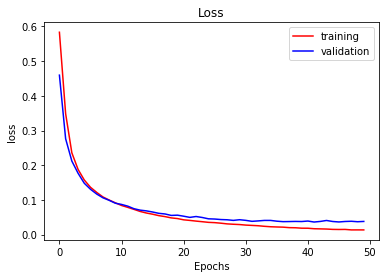

In [186]:
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='blue', label='validation')
plt.legend(loc='best')

In [187]:
acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

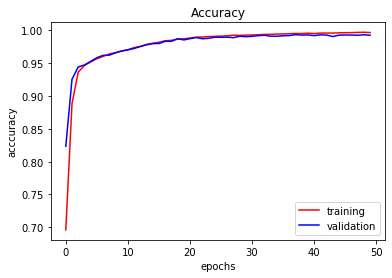

In [188]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('acccuracy')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='blue', label='validation')
plt.legend(loc='best')

## Neural network evaluation

In [189]:
final_model = Sequential()
final_model.add(Dense(units=100, input_dim=number_of_features, activation='relu'))
final_model.add(Dense(units=40, activation='relu'))
final_model.add(Dense(units=20, activation='relu'))
final_model.add(Dropout(0.1))
final_model.add(Dense(units=output_size, activation='sigmoid'))
final_model.compile(optimizers.Adam(learning_rate = 0.0001), loss=losses.BinaryCrossentropy(), metrics=['accuracy'])
history = final_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose = 1)

Epoch 1/50
1643/1643 [==============================] - 7s 4ms/step - loss: 0.5817 - accuracy: 0.6981
Epoch 2/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.3361 - accuracy: 0.8965
Epoch 3/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.2318 - accuracy: 0.9360
Epoch 4/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.1824 - accuracy: 0.9452
Epoch 5/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.1494 - accuracy: 0.9532
Epoch 6/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.1300 - accuracy: 0.9566
Epoch 7/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.1148 - accuracy: 0.9614
Epoch 8/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.1024 - accuracy: 0.9652
Epoch 9/50
1643/1643 [==============================] - 8s 5ms/step - loss: 0.0925 - accuracy: 0.9693
Epoch 10/50
1643/1643 [==============================] - 9s 6ms/step - loss: 0.083

In [190]:
test_loss, test_accuracy = final_model.evaluate(X_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_accuracy))

809/809 [==============================] - 3s 3ms/step - loss: 0.0271 - accuracy: 0.9944
Test loss: 0.02712261863052845, test accuracy: 0.9943987131118774


In [191]:
train_loss, train_accuracy = final_model.evaluate(X_train, y_train)
print ("Train loss: {}, train accuracy: {}".format(train_loss, train_accuracy))

1643/1643 [==============================] - 6s 3ms/step - loss: 0.0127 - accuracy: 0.9981
Train loss: 0.012694799341261387, train accuracy: 0.9980782866477966


## Save model

In [192]:
from keras.models import load_model

In [193]:
model.save('final_model.h5') 